In [ ]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 1. Load your saved model
model = load_model("Model_7/best_model_mobilenetv2.keras")

# 2. Define the class names (must match training order!)
class_names = ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']

# 3. Prediction function for image URL
def predict_image_from_url(image_url, true_label=None):
    # Download and open the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    resized_img = img.resize((160, 160))

    # Preprocess the image for MobileNetV2
    img_array = np.array(resized_img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Make prediction
    pred = model.predict(img_array)
    predicted_index = np.argmax(pred, axis=1)[0]
    predicted_label = class_names[predicted_index]

    # Determine if the prediction is correct
    if true_label is not None:
        is_correct = (predicted_label == true_label)
        color = "green" if is_correct else "red"
        status = " Correct" if is_correct else "Incorrect"
        title = f"Prediction:{predicted_label} — {status}"
    else:
        color = "blue"
        title = f"Prediction: {predicted_label}"

    # Display the image and prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(title, color=color)
    plt.show()

    # Print top-3 confidence (optional)
    top3 = np.argsort(pred[0])[-3:][::-1]
    print("Top-3 predictions:")
    for i in top3:
        print(f"{class_names[i]}: {pred[0][i]*100:.2f}%")

    return predicted_label


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


c:\Users\jeand\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


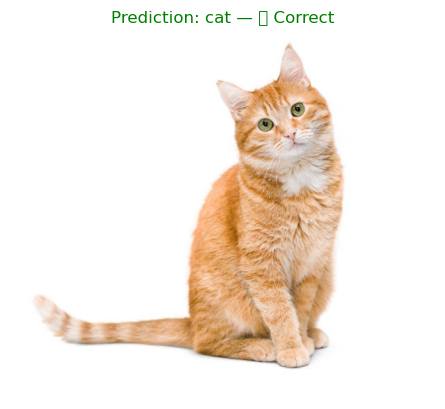

Top-3 predictions:
cat: 100.00%
dog: 0.00%
squirrel: 0.00%


'cat'

In [15]:
# Image URL and expected label
url = "https://media.istockphoto.com/id/1443562748/fr/photo/mignon-chat-gingembre.jpg?s=612x612&w=0&k=20&c=ygNVVnqLk9V8BWu4VQ0D21u7-daIyHUoyKlCcx3K1E8="
true_label = "cat"  # Update based on what it should be

# Run prediction
predict_image_from_url(url, true_label)
